<a href="https://colab.research.google.com/github/xiaochengJF/DeepLearning/blob/master/Anchor_Kmeans(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
cd /content/drive/My Drive/ChongQingJiu/json

/content/drive/My Drive/ChongQingJiu/json


In [0]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [0]:
def iou(box, clusters):
    x = np.minimum(clusters[:, 0], box[0])
    y = np.minimum(clusters[:, 1], box[1])
    if np.count_nonzero(x == 0) > 0 or np.count_nonzero(y == 0) > 0:
        raise ValueError("Box has no area")

    intersection = x * y
    box_area = box[0] * box[1]
    cluster_area = clusters[:, 0] * clusters[:, 1]

    iou_ = intersection / (box_area + cluster_area - intersection + 1e-10)

    return iou_

def avg_iou(boxes, clusters):
    return np.mean([np.max(iou(boxes[i], clusters)) for i in range(boxes.shape[0])])

def translate_boxes(boxes):
    new_boxes = boxes.copy()
    for row in range(new_boxes.shape[0]):
        new_boxes[row][2] = np.abs(new_boxes[row][2] - new_boxes[row][0])
        new_boxes[row][3] = np.abs(new_boxes[row][3] - new_boxes[row][1])
    return np.delete(new_boxes, [0, 1], axis=1)

def kmeans(boxes, k, dist=np.median):
    rows = boxes.shape[0]

    distances = np.empty((rows, k))
    last_clusters = np.zeros((rows,))

    np.random.seed()

    clusters = boxes[np.random.choice(rows, k, replace=False)]

    while True:
        for row in range(rows):
            distances[row] = 1 - iou(boxes[row], clusters)

        nearest_clusters = np.argmin(distances, axis=1)

        if (last_clusters == nearest_clusters).all():
            break

        for cluster in range(k):
            clusters[cluster] = dist(boxes[nearest_clusters == cluster], axis=0)

        last_clusters = nearest_clusters

    return clusters

def get_kmeans(anno, cluster_num=9):

    anchors = kmeans(anno, cluster_num)
    ave_iou = avg_iou(anno, anchors)

    anchors = anchors.astype('int').tolist()

    anchors = sorted(anchors, key=lambda x: x[0] * x[1])

    return anchors, ave_iou

In [0]:
def parse_anno(annotation_path):
    box_wh = []   # 总框的宽高
    box_wh1 = []  # 1框的宽高
    box_wh2 = []  # 2框的宽高
    box_wh3 = []  # 3框的宽高
    box_wh4 = []  # 4框的宽高
    box_wh5 = []  # 5框的宽高
    box_wh6 = []  # 6框的宽高
    box_wh7 = []  # 7框的宽高
    box_wh8 = []  # 8框的宽高
    box_wh9 = []  # 9框的宽高
    box_wh10 = [] # 10框的宽高
    box_wh11 = []  # 8框的宽高
    box_wh12 = []  # 9框的宽高
    box_wh13 = [] # 10框的宽高
    with open(annotation_path) as f:
        data = json.load(f)
        
    for i in data['images']:
        file_name = i['file_name']
        image_id = i['id']
        for a in data['annotations']:
            if a['image_id'] == image_id:
                bbox = [int(b) for b in a['bbox']]
                box_wh.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 1:
                    box_wh1.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 2:
                    box_wh2.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 3:
                    box_wh3.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 4:
                    box_wh4.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 5:
                    box_wh5.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 6:
                    box_wh6.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 7:
                    box_wh7.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 8:
                    box_wh8.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 9:
                    box_wh9.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 10:
                    box_wh10.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 11:
                    box_wh11.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 12:
                    box_wh12.append([bbox[2], bbox[3]])
                if int(a["category_id"]) == 13:
                    box_wh13.append([bbox[2], bbox[3]])
            
    result = np.asarray(box_wh)
    result1 = np.asarray(box_wh1)
    result2 = np.asarray(box_wh2)
    result3 = np.asarray(box_wh3)
    result4 = np.asarray(box_wh4)
    result5 = np.asarray(box_wh5)
    result6 = np.asarray(box_wh6)
    result7 = np.asarray(box_wh7)
    result8 = np.asarray(box_wh8)
    result9 = np.asarray(box_wh9)
    result10 = np.asarray(box_wh10)
    result11 = np.asarray(box_wh11)
    result12 = np.asarray(box_wh12)
    result13 = np.asarray(box_wh13)
    return result,result1,result2,result3,result4,result5,result6,result7,result8,result9,result10,result11,result12,result13       
    

In [0]:
#annotation_path = "annotations1.json"
#result,result1,result2,result3,result4,result5,result6,result7,result8,result9,result10,result11,result12,result13 = parse_anno(annotation_path)

In [0]:
annotation_path = "annotations2.json"
result,result1,result2,result3,result4,result5,result6,result7,result8,result9,result10,result11,result12,result13 = parse_anno(annotation_path)

In [25]:
#with open('./annotations1.json') as f:
    #data0 = json.load(f)
with open('./annotations2.json') as f:
    data = json.load(f)

#category_dic_0 = dict([(c['id'],c['name']) for c in data0['categories']])
#print(category_dic_0)   
category_dic = dict([(c['id'],c['name']) for c in data['categories']])
category_dic

{0: '背景',
 1: '瓶盖破损',
 2: '瓶盖变形',
 3: '瓶盖坏边',
 4: '瓶盖打旋',
 5: '瓶盖断点',
 6: '标贴歪斜',
 7: '标贴起皱',
 8: '标贴气泡',
 9: '喷码正常',
 10: '喷码异常',
 11: '酒液杂质',
 12: '瓶身破损',
 13: '瓶身气泡'}

{'瓶盖破损': 0, '喷码正常': 0, '瓶盖断点': 0, '瓶盖坏边': 0, '瓶盖打旋': 0, '瓶身破损': 73, '背景': 985, '瓶盖变形': 0, '瓶身气泡': 131, '标贴气泡': 0, '标贴歪斜': 0, '喷码异常': 0, '酒液杂质': 2469, '标贴起皱': 0}


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30772 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30721 missing from current font.
  font.set_

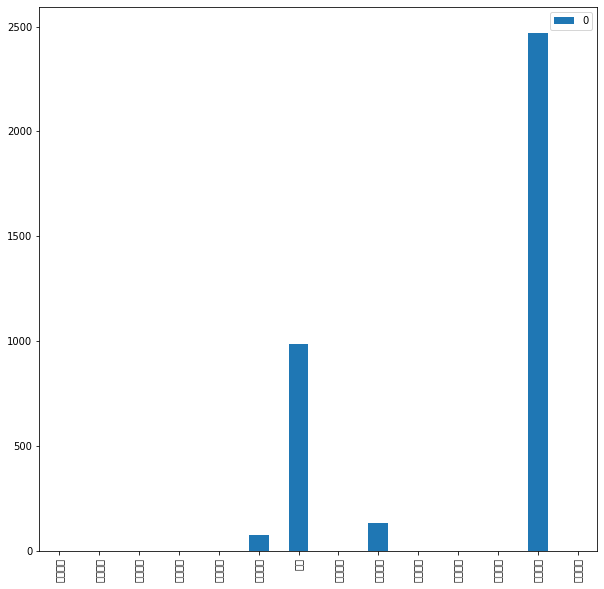

In [27]:
# counts_label = dict([(c['name'],0) for c in data0['categories']])
counts_label = dict([(c['name'],0) for c in data['categories']])
#for a in data0['annotations']:
    #counts_label[category_dic[a['category_id']]] += 1

# counts_label = dict([(c['name'],0) for c in data['categories']])
for a in data['annotations']:
    counts_label[category_dic[a['category_id']]] += 1
print(counts_label)

ind = counts_label.keys()
val = counts_label.values()
Count_df = pd.DataFrame(list(val), index=ind)
Count_df.plot(kind='bar',y=Count_df.columns)
plt.show()

## 统计各类别比例

In [0]:
img_sum = sum(list(val))
print(list(val))
print(img_sum)
ima_ratio = [round(i/10603,3) for i in list(val)]
print(ima_ratio)

[1619, 489, 614, 656, 480, 73, 2155, 705, 131, 443, 186, 199, 2469, 384]
10603
[0.153, 0.046, 0.058, 0.062, 0.045, 0.007, 0.203, 0.066, 0.012, 0.042, 0.018, 0.019, 0.233, 0.036]


In [0]:
#counts_label = dict([(c['name'],0) for c in data['categories']])
#for a in data['annotations']:
#    counts_label[category_dic[a['category_id']]] += 1
#print(counts_label)
#
#ind = counts_label.keys()
#val = counts_label.values()
#Count_df = pd.DataFrame(list(val), index=ind)
#Count_df.plot(kind='bar',y=Count_df.columns)
#plt.show()

## 目标中心位置分布

In [0]:
b_x1 = []
b_y1 = []
b_x2 = []
b_y2 = []
b_x3 = []
b_y3 = []
b_x4 = []
b_y4 = []
b_x5 = []
b_y5 = []
b_x6 = []
b_y6 = []
b_x7 = []
b_y7 = []
b_x8 = []
b_y8 = []
b_x9 = []
b_y9 = []
b_x10 = []
b_y10 = []
b_x11 = []
b_y11 = []
b_x12 = []
b_y12 = []
b_x13 = []
b_y13 = []
for a in data['annotations']:
    bbox = [int(b) for b in a['bbox']]
    if int(a["category_id"]) == 1:
        b_x1.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y1.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 2:
        b_x2.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y2.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 3:
        b_x3.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y3.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 4:
        b_x4.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y4.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 5:
        b_x5.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y5.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 6:
        b_x6.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y6.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 7:
        b_x7.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y7.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 8:
        b_x8.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y8.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 9:
        b_x9.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y9.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 10:
        b_x10.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y10.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 11:
        b_x11.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y11.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 12:
        b_x12.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y12.append(bbox[1] + int(bbox[3]/2) - 1)
    if int(a["category_id"]) == 13:
        b_x13.append(bbox[0] + int(bbox[2]/2) - 1)
        b_y13.append(bbox[1] + int(bbox[3]/2) - 1)

In [0]:
plt.subplot(221)
plt.scatter(b_x1, b_y1, alpha=0.4, label='1瓶盖破损')
plt.legend()
plt.subplot(222)
plt.scatter(b_x2, b_y2, alpha=0.4, label='2瓶盖变形')
plt.legend()
plt.subplot(223)
plt.scatter(b_x3, b_y3, alpha=0.4, label='3瓶盖坏边')
plt.legend()
plt.subplot(224)
plt.scatter(b_x4, b_y4, alpha=0.4, label='4瓶盖打旋')
plt.legend()
plt.show()

In [0]:
plt.subplot(221)
plt.scatter(b_x5, b_y5, alpha=0.4, label='5瓶盖断点')
plt.legend()
plt.subplot(222)
plt.scatter(b_x6, b_y6, alpha=0.4, label='6标签歪斜')
plt.legend()
plt.subplot(223)
plt.scatter(b_x7, b_y7, alpha=0.4, label='7标贴起皱')
plt.legend()
plt.subplot(224)
plt.scatter(b_x8, b_y8, alpha=0.4, label='8标贴气泡')
plt.legend()
plt.show()

In [0]:
plt.subplot(221)
plt.scatter(b_x9, b_y9, alpha=0.4, label='9喷码正常')
plt.legend()
plt.subplot(222)
plt.scatter(b_x10, b_y10, alpha=0.4, label='10喷码异常')
plt.legend()
plt.show()

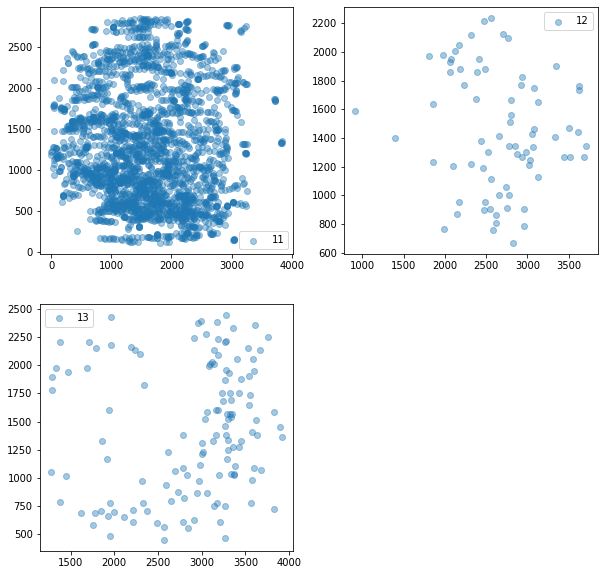

In [0]:
plt.subplot(221)
plt.scatter(b_x11, b_y11, alpha=0.4, label='11')
plt.legend()
plt.subplot(222)
plt.scatter(b_x12, b_y12, alpha=0.4, label='12')
plt.legend()
plt.subplot(223)
plt.scatter(b_x13, b_y13, alpha=0.4, label='13')
plt.legend()
plt.show()

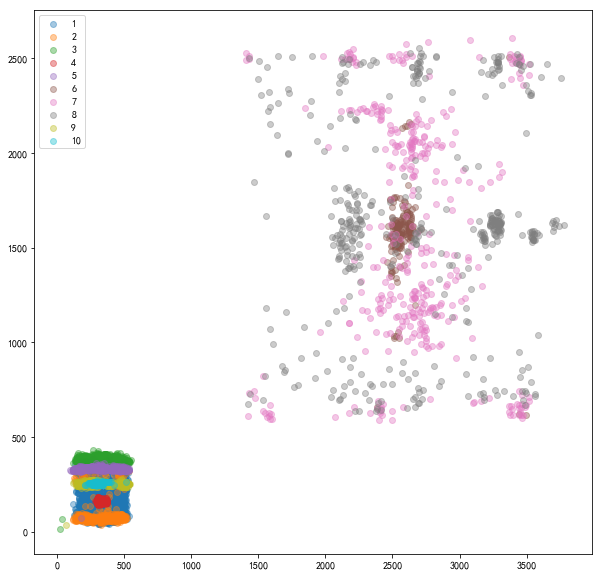

In [0]:
plt.scatter(b_x1, b_y1, alpha=0.4, label='1')
plt.scatter(b_x2, b_y2, alpha=0.4, label='2')
plt.scatter(b_x3, b_y3, alpha=0.4, label='3')
plt.scatter(b_x4, b_y4, alpha=0.4, label='4')
plt.scatter(b_x5, b_y5, alpha=0.4, label='5')
plt.scatter(b_x6, b_y6, alpha=0.4, label='6')
plt.scatter(b_x7, b_y7, alpha=0.4, label='7')
plt.scatter(b_x8, b_y8, alpha=0.4, label='8')
plt.scatter(b_x9, b_y9, alpha=0.4, label='9喷码正常')
plt.scatter(b_x10, b_y10, alpha=0.4, label='10喷码异常')
plt.legend()
plt.show()

## 聚类分析bbox尺寸


#### 总体分布

In [0]:
for k in range(10, 21):
        anchors, ave_iou = get_kmeans(result, k)

        anchor_string = ''
        for anchor in anchors:
            anchor_string += '[{},{}] '.format(anchor[0], anchor[1])
        anchor_string = anchor_string[:-2]

        print('当k={}:\n anchor：{}]'.format(k, anchor_string))
        #print('the average iou is:')
        #print(ave_iou)

当k=10:
 anchor：[11,13] [17,14] [20,21] [25,35] [94,14] [59,26] [51,46] [177,39] [97,81] [359,130]
当k=11:
 anchor：[11,12] [13,18] [18,15] [22,22] [27,38] [85,17] [54,39] [177,39] [93,81] [356,120] [2251,1609]
当k=12:
 anchor：[11,11] [14,13] [11,23] [18,17] [24,22] [27,38] [85,17] [54,39] [177,39] [93,81] [356,120] [2251,1609]
当k=13:
 anchor：[13,13] [14,22] [21,19] [25,34] [49,18] [106,17] [42,45] [67,39] [180,39] [97,81] [358,115] [133,537] [2263,1613]
当k=14:
 anchor：[11,11] [14,14] [11,23] [22,14] [19,19] [23,31] [54,18] [46,39] [106,17] [89,73] [177,39] [358,115] [133,529] [2263,1613]
当k=15:
 anchor：[11,11] [16,15] [11,23] [27,15] [21,22] [61,13] [27,39] [53,38] [113,19] [89,77] [178,39] [358,115] [133,529] [2281,1501] [2037,2039]
当k=16:
 anchor：[13,13] [17,21] [22,18] [22,34] [86,15] [38,35] [63,34] [44,55] [73,57] [149,40] [205,38] [101,81] [109,161] [358,114] [141,565] [2263,1613]
当k=17:
 anchor：[11,12] [18,11] [15,15] [11,26] [18,19] [23,22] [53,14] [29,39] [109,18] [55,38] [89,77]

(204, 2)

In [34]:
for k in range(2, 10):
        anchors, ave_iou = get_kmeans(result12, k)

        anchor_string = ''
        for anchor in anchors:
            anchor_string += '[{},{}] '.format(anchor[0], anchor[1])
        anchor_string = anchor_string[:-2]

        print('当k={}:\n anchor：{}]'.format(k, anchor_string))
        #print('the average iou is:')
        #print(ave_iou)

当k=2:
 anchor：[37,64] [268,589]
当k=3:
 anchor：[35,63] [123,395] [374,640]
当k=4:
 anchor：[27,61] [41,73] [125,405] [381,632]
当k=5:
 anchor：[34,62] [25,121] [54,147] [140,408] [381,698]
当k=6:
 anchor：[34,63] [376,125] [123,395] [640,350] [301,787] [257,1687]
当k=7:
 anchor：[29,35] [37,63] [40,141] [58,211] [124,394] [193,811] [529,573]
当k=8:
 anchor：[27,61] [40,67] [29,133] [54,166] [77,399] [165,475] [640,326] [338,811]
当k=9:
 anchor：[27,61] [40,65] [53,149] [123,393] [169,713] [640,196] [289,853] [461,575] [916,1237]


In [37]:
for k in range(2, 10):
        anchors, ave_iou = get_kmeans(result13, k)

        anchor_string = ''
        for anchor in anchors:
            anchor_string += '[{},{}] '.format(anchor[0], anchor[1])
        anchor_string = anchor_string[:-2]

        print('当k={}:\n anchor：{}]'.format(k, anchor_string))
        #print('the average iou is:')
        #print(ave_iou)

当k=2:
 anchor：[65,61] [141,113]
当k=3:
 anchor：[43,43] [89,73] [153,129]
当k=4:
 anchor：[53,53] [101,81] [149,149] [261,114]
当k=5:
 anchor：[43,43] [77,69] [89,113] [137,77] [181,149]
当k=6:
 anchor：[33,34] [45,45] [77,69] [89,113] [137,77] [187,145]
当k=7:
 anchor：[43,43] [65,73] [93,61] [89,113] [137,77] [117,157] [201,124]
当k=8:
 anchor：[35,33] [44,47] [65,73] [93,61] [89,113] [137,77] [149,159] [261,114]
当k=9:
 anchor：[40,37] [55,57] [65,73] [99,53] [95,73] [137,69] [89,121] [151,91] [201,157]


In [38]:
import numpy as np
result14 = np.concatenate((result12,result13))
#result14.shape
for k in range(2, 10):
        anchors, ave_iou = get_kmeans(result14, k)

        anchor_string = ''
        for anchor in anchors:
            anchor_string += '[{},{}] '.format(anchor[0], anchor[1])
        anchor_string = anchor_string[:-2]

        print('当k={}:\n anchor：{}]'.format(k, anchor_string))
        #print('the average iou is:')
        #print(ave_iou)

当k=2:
 anchor：[81,73] [257,405]
当k=3:
 anchor：[45,61] [121,109] [298,625]
当k=4:
 anchor：[37,53] [89,73] [150,143] [319,675]
当k=5:
 anchor：[37,53] [89,69] [109,113] [195,186] [301,713]
当k=6:
 anchor：[33,33] [41,61] [65,105] [109,69] [163,149] [319,675]
当k=7:
 anchor：[36,50] [65,69] [127,69] [89,113] [61,189] [177,149] [319,675]
当k=8:
 anchor：[37,52] [77,69] [137,77] [89,129] [197,137] [122,408] [640,326] [301,805]
当k=9:
 anchor：[29,37] [45,49] [53,73] [89,61] [137,77] [89,128] [199,139] [122,408] [360,676]


In [53]:
x33 = result14[:,0]/result14[:,1]
x33

array([0.56164384, 0.34525277, 0.53246753, 0.23702665, 0.38686131,
       0.3837535 , 0.46575342, 1.4097561 , 0.578125  , 0.77358491,
       0.64725458, 0.42857143, 0.3970894 , 0.36778116, 0.50684932,
       4.24770642, 0.21893491, 0.21325967, 1.27923211, 0.47540984,
       0.67272727, 0.1577655 , 0.33817701, 1.99680511, 0.59183673,
       1.00948767, 0.23448276, 0.28848347, 1.92647059, 1.06122449,
       0.44262295, 0.36507937, 4.68794326, 0.53623188, 0.29927007,
       0.30105263, 0.10294118, 0.39534884, 0.24484536, 0.6625    ,
       0.30872483, 0.2733945 , 0.60138648, 0.65250965, 0.41538462,
       0.18518519, 0.19012346, 0.22981366, 0.44736842, 0.4816    ,
       1.38227147, 0.42738589, 1.41168996, 0.03412377, 0.50632911,
       0.91836735, 0.41737033, 0.69230769, 0.23012552, 0.59304933,
       0.31078905, 0.55737705, 0.20661157, 0.43396226, 1.06060606,
       0.41772152, 0.19083969, 0.88571429, 1.19047619, 7.03208556,
       0.80090498, 0.33152174, 3.24561404, 1.39344262, 1.79207

In [56]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0

for i in x33:
    if i <= 0.25:
        count1 +=1
    if 0.25 < i <= 0.5:
        count2 +=1
    if 0.5 < i <= 1:
        count3 +=1
    if 1 < i <= 2:
        count4 +=1
    if 2 < i <= 3:
        count5 +=1
    if 3 < i <= 4:
        count6 +=1
    if i > 2:
        count7 +=1
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)
print(count8)
print(count9)

14
29
73
68
14
3
20
0
0


In [57]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count7 = 0
count8 = 0
count9 = 0

for i in x33:
    if i <= 1:
        count1 +=1
    if 1 < i <= 2:
        count2 +=1
    if 2 < i <= 3:
        count3 +=1
    if 3 < i <= 4:
        count4 +=1
    if 4 < i <= 5:
        count5 +=1
    if 5 < i <= 6:
        count6 +=1
    if i > 6:
        count7 +=1
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)
print(count6)
print(count7)
print(count8)
print(count9)

116
68
14
3
2
0
1
0
0


## 各类别目标尺寸分布

In [0]:
x1 = result1[:,0]
y1 = result1[:,1]
x2 = result2[:,0]
y2 = result2[:,1]
x3 = result3[:,0]
y3 = result3[:,1]
x4 = result4[:,0]
y4 = result4[:,1]
x5 = result5[:,0]
y5 = result5[:,1]
x6 = result6[:,0]
y6 = result6[:,1]
x7 = result7[:,0]
y7 = result7[:,1]
x8 = result8[:,0]
y8 = result8[:,1]
x9 = result9[:,0]
y9 = result9[:,1]
x10 = result10[:,0]
y10 = result10[:,1]
x11 = result11[:,0]
y11 = result11[:,1]
x12 = result12[:,0]
y12 = result12[:,1]
x13 = result13[:,0]
y13 = result13[:,1]

plt.scatter(x1, y1,  alpha=0.4, label='1瓶盖破损')
plt.scatter(x2, y2,  alpha=0.4, label='2瓶盖变形')
plt.scatter(x3, y3, alpha=0.4, label='3瓶盖坏边')
plt.scatter(x4, y4, alpha=0.4, label='4瓶盖打旋')
plt.scatter(x5, y5, alpha=0.4, label='5瓶盖断点')
plt.scatter(x6, y6, alpha=0.4, label='6标签歪斜')
plt.scatter(x7, y7, alpha=0.4, label='7标贴起皱')
plt.scatter(x8, y8, alpha=0.4, label='8标贴气泡')
plt.scatter(x9, y9, alpha=0.4, label='9喷码正常')
plt.scatter(x10, y10, alpha=0.4, label='10喷码异常')
plt.scatter(x11, y11, alpha=0.4, label='11')
plt.scatter(x12, y12, alpha=0.4, label='12')
plt.scatter(x13, y13, alpha=0.4, label='13')
plt.legend()
plt.show()

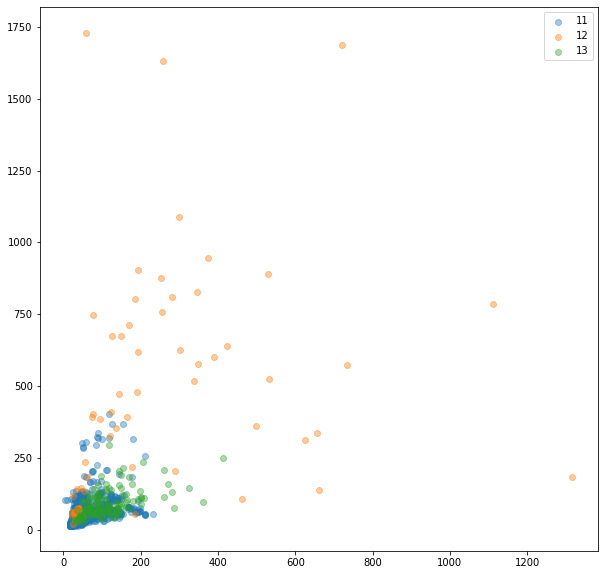

In [31]:
x11 = result11[:,0]
y11 = result11[:,1]
x12 = result12[:,0]
y12 = result12[:,1]
x13 = result13[:,0]
y13 = result13[:,1]

plt.scatter(x11, y11, alpha=0.4, label='11')
plt.scatter(x12, y12, alpha=0.4, label='12')
plt.scatter(x13, y13, alpha=0.4, label='13')
plt.legend()
plt.show()

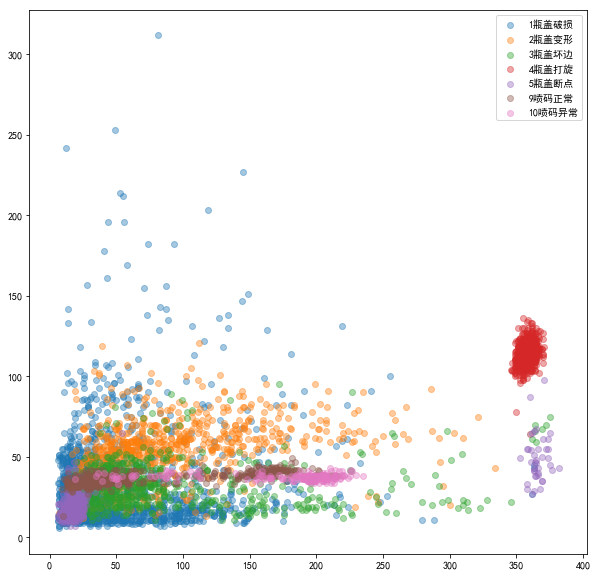

In [0]:
plt.scatter(x1, y1,  alpha=0.4, label='1瓶盖破损')
plt.scatter(x2, y2,  alpha=0.4, label='2瓶盖变形')
plt.scatter(x3, y3, alpha=0.4, label='3瓶盖坏边')
plt.scatter(x4, y4, alpha=0.4, label='4瓶盖打旋')
plt.scatter(x5, y5, alpha=0.4, label='5瓶盖断点')
plt.scatter(x9, y9, alpha=0.4, label='9喷码正常')
plt.scatter(x10, y10, alpha=0.4, label='10喷码异常')

plt.legend()
plt.show()

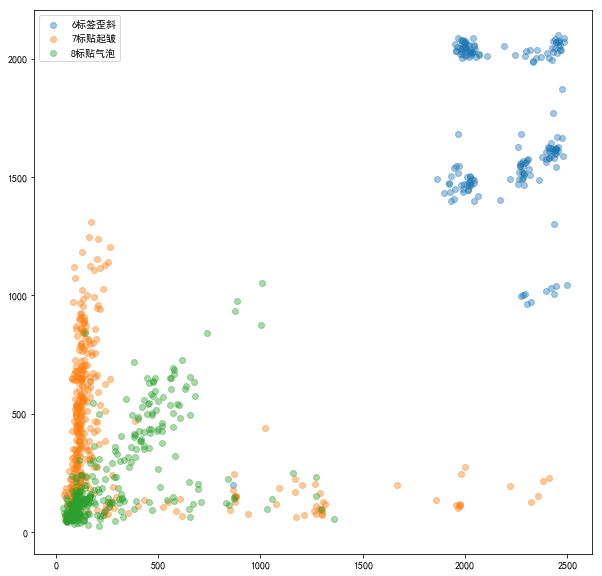

In [0]:
plt.scatter(x6, y6, alpha=0.4, label='6标签歪斜')
plt.scatter(x7, y7, alpha=0.4, label='7标贴起皱')
plt.scatter(x8, y8, alpha=0.4, label='8标贴气泡')

plt.legend()
plt.show()

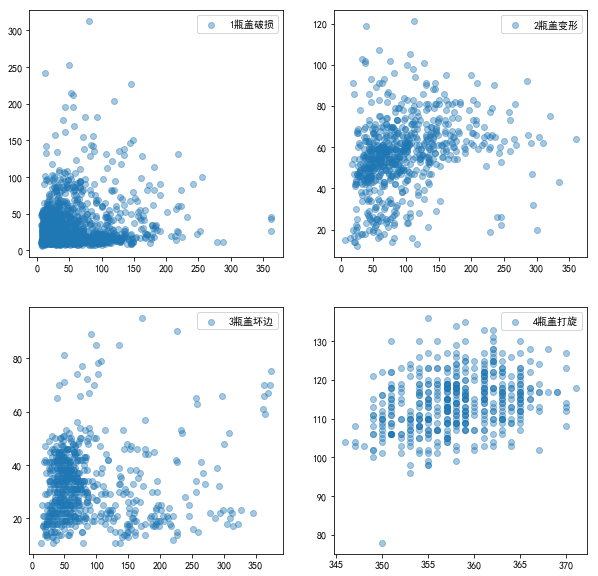

In [0]:
plt.subplot(221)
plt.scatter(x1, y1,  alpha=0.4, label='1瓶盖破损')
plt.legend()
plt.subplot(222)
plt.scatter(x2, y2,  alpha=0.4, label='2瓶盖变形')
plt.legend()
plt.subplot(223)
plt.scatter(x3, y3, alpha=0.4, label='3瓶盖坏边')
plt.legend()
plt.subplot(224)
plt.scatter(x4, y4, alpha=0.4, label='4瓶盖打旋')
plt.legend()
plt.show()

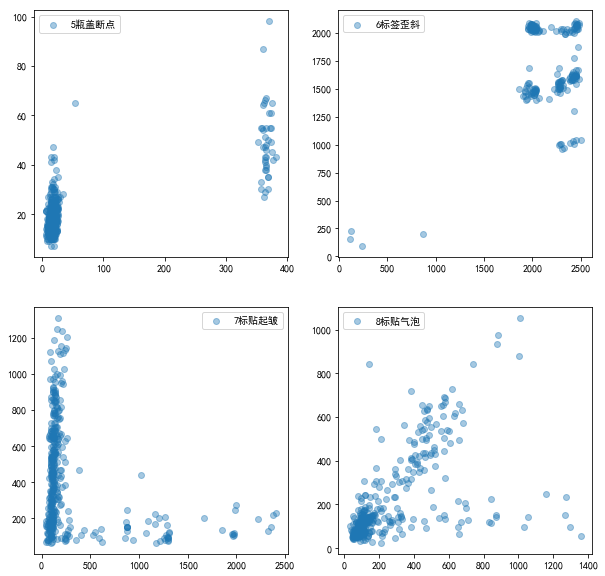

In [0]:
plt.subplot(221)
plt.scatter(x5, y5, alpha=0.4, label='5瓶盖断点')
plt.legend()
plt.subplot(222)
plt.scatter(x6, y6, alpha=0.4, label='6标签歪斜')
plt.legend()
plt.subplot(223)
plt.scatter(x7, y7, alpha=0.4, label='7标贴起皱')
plt.legend()
plt.subplot(224)
plt.scatter(x8, y8, alpha=0.4, label='8标贴气泡')
plt.legend()
plt.show()

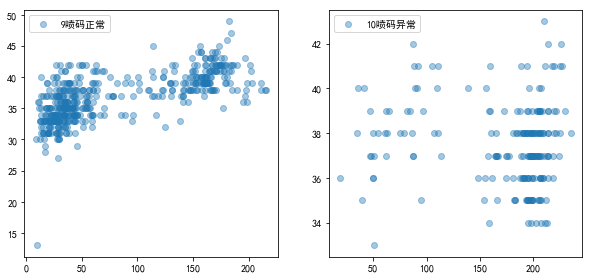

In [0]:
plt.subplot(221)
plt.scatter(x9, y9, alpha=0.4, label='9喷码正常')
plt.legend()
plt.subplot(222)
plt.scatter(x10, y10, alpha=0.4, label='10喷码异常')
plt.legend()
plt.show()

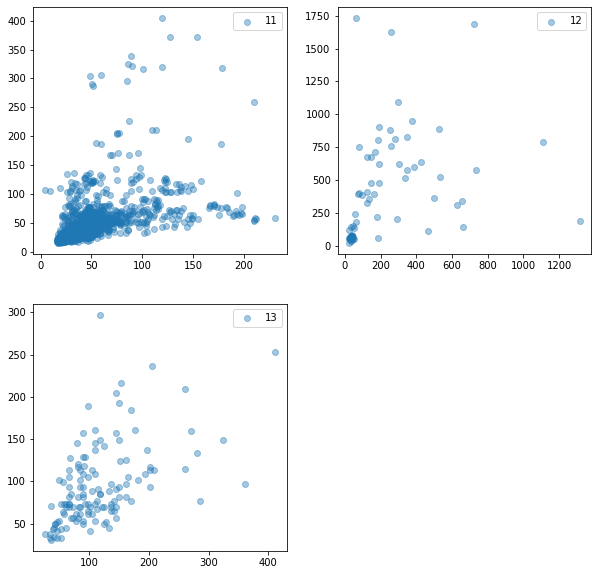

In [32]:
plt.subplot(221)
plt.scatter(x11, y11, alpha=0.4, label='11')
plt.legend()
plt.subplot(222)
plt.scatter(x12, y12, alpha=0.4, label='12')
plt.legend()
plt.subplot(223)
plt.scatter(x13, y13, alpha=0.4, label='13')
plt.legend()
plt.show()

In [0]:
all = [result1,result2,result3,result4,result5,result6,result7,result8,result9,result10]
k = 2
i = 1
for resulti in all:
    anchors, ave_iou = get_kmeans(resulti, k)
    anchor_string = ''
    for anchor in anchors:
        anchor_string += '[{},{}] '.format(anchor[0], anchor[1])
    anchor_string = anchor_string[:-2]
    print('类别为：{}:\n anchor：{}]'.format(i, anchor_string))
    i += 1

类别为：1:
 anchor：[16,19] [68,29]
类别为：2:
 anchor：[57,51] [133,64]
类别为：3:
 anchor：[50,33] [157,26]
类别为：4:
 anchor：[356,109] [359,118]
类别为：5:
 anchor：[16,15] [21,22]
类别为：6:
 anchor：[2281,1509] [2037,2039]
类别为：7:
 anchor：[109,149] [129,569]
类别为：8:
 anchor：[93,85] [469,393]
类别为：9:
 anchor：[33,35] [160,39]
类别为：10:
 anchor：[75,38] [199,37]


In [0]:
#np.savetxt('all.csv', result, delimiter = ',') 
#np.savetxt('n1.csv', result1, delimiter = ',') 
#np.savetxt('2.csv', result2, delimiter = ',') 
#np.savetxt('3.csv', result3, delimiter = ',') 
#np.savetxt('4.csv', result4, delimiter = ',') 
#np.savetxt('5.csv', result5, delimiter = ',') 
#np.savetxt('6.csv', result6, delimiter = ',') 
#np.savetxt('7.csv', result7, delimiter = ',') 
#np.savetxt('8.csv', result8, delimiter = ',') 
#np.savetxt('9.csv', result9, delimiter = ',') 
#np.savetxt('10.csv', result10, delimiter = ',') 